# Загружение данных по вакансиям

In [1]:
import pandas as pd
import numpy as np
data = pd.read_excel("C:\\Users\\Lenovo\\Downloads\\work__final.xlsx")

In [2]:
lt=[]
w=0
for i in range(len(data)):
    lt.append(0)
for i in range(len(data)):
    if lt[i]==0:
        w+=1
        for j in range(len(data)):
            if data['Город'][i]==data['Город'][j]:
                lt[j]=w

Создание id_городов

In [3]:
list_num = [] 
for i in range(len(data)): 
    try: 
        num = lt[i] 
        list_num.append(int(num)) 
    except ValueError: 
        continue 
column_values = pd.Series(list_num) 
data.insert(loc=7, column='id_городов', value=column_values)

In [4]:
data

,позиция,id_позиций,зарплата,Зарплата_от,Зарплата_до,Зарплата_средняя,Город,id_городов,Организация,ставка,нужный опыт,айди страницы
0,Инженер ПТО,1,от 150 000 до 220 000 KZT на руки,150000,220000,185000,Алматы,1,ТОО Метако ПФ,8,4,47012114
1,Инженер ПТО на линию,2,от 300 000 до 350 000 KZT на руки,300000,350000,325000,Нур-Султан,2,ТОО Асем-Құрылыс Групп,8,4,47127963
2,Инженер ПТО,1,от 350 000 до 400 000 KZT на руки,350000,400000,375000,Алматы,1,ТОО Энергетические системы БиС,8,4,47513718
3,Инженер ПТО,1,от 300 000 до 350 000 KZT на руки,300000,350000,325000,Нур-Султан,2,ТОО Astana Reality Group,8,4,47352631
4,Инженер-сметчик,3,от 300 000 до 300 000 KZT до вычета налогов,300000,300000,300000,Нур-Султан,2,ТОО КазИнженерСтрой,8,4,47190864
...,...,...,...,...,...,...,...,...,...,...,...,...
145,Сервисный инженер,28,от 160 000 до 230 000 KZT на руки,160000,230000,195000,Нур-Султан,2,MFITNESS,8,4,47686595
146,Инженер-проектировщик слаботочных систем,68,от 45 000 до 85 000 руб. на руки,262000,494000,378000,Усть-Каменогорск,11,ООО АПС Групп,8,4,47111642
147,Инженер-проектировщик слаботочных систем,68,от 45 000 до 85 000 руб. на руки,262000,494000,378000,Семей,24,ООО АПС Групп,8,4,46937042
148,Сервис-инженер / специалист по заправке картри...,75,от 120 000 до 190 000 KZT до вычета налогов,120000,190000,155000,Нур-Султан,2,ТОО ARKUDA COMPANY,8,2,47663841


Функция unique() находит уникальные элементы массива и возвращает их в отсортированном массиве.
freq возвращает частоту, примененную к данному объекту, top - это как мода, много встречающие элементы столбцы.

In [5]:
data["зарплата"].describe()

count                                   150
unique                                  101
top       от 250 000 до 250 000 KZT на руки
freq                                      5
Name: зарплата, dtype: object

Функция mean() вычисляет среднее арифметическое значений элементов массива.

std - это число, которое описывает, как распределены наблюдения. Математическая функция будет испытывать трудности с предсказанием точных значений, если наблюдения "разбросаны". Стандартное отклонение-это мера неопределенности. 
Низкое стандартное отклонение означает, что большинство чисел близки к среднему (среднему) значению.Высокое стандартное отклонение означает, что значения распределены в более широком диапазоне.

25%,50%,75% Перцентиль - это показатель, используемый в статистике, показывающий значение, ниже которого падает определенный процент наблюдений в группе наблюдений.

In [6]:
data['Зарплата_средняя'].describe()

count       150.000000
mean     270564.273333
std      116806.415943
min       75000.000000
25%      190000.000000
50%      250000.000000
75%      325000.000000
max      870000.000000
Name: Зарплата_средняя, dtype: float64

In [7]:
data["позиция"].describe()

count             150
unique             75
top       Инженер ПТО
freq               31
Name: позиция, dtype: object

In [8]:
data["нужный опыт"].describe()

count    150.000000
mean       2.760000
std        1.649405
min        0.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        6.000000
Name: нужный опыт, dtype: float64

In [9]:
data["Организация"].describe()

count               150
unique              140
top       ООО АПС Групп
freq                  5
Name: Организация, dtype: object

In [10]:
data["Город"].describe()

count        150
unique        24
top       Алматы
freq          45
Name: Город, dtype: object

In [11]:
import matplotlib.pyplot as plt

In [12]:
X = data[['Зарплата_от', 'Зарплата_до']]
y = data['id_позиций']

In [13]:
from sklearn import linear_model

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   позиция           150 non-null    object
 1   id_позиций        150 non-null    int64 
 2   зарплата          150 non-null    object
 3   Зарплата_от       150 non-null    int64 
 4   Зарплата_до       150 non-null    int64 
 5   Зарплата_средняя  150 non-null    int64 
 6   Город             150 non-null    object
 7   id_городов        150 non-null    int64 
 8   Организация       150 non-null    object
 9   ставка            150 non-null    int64 
 10  нужный опыт       150 non-null    int64 
 11  айди страницы     150 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 14.2+ KB


In [15]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [16]:
predicted_rbt = regr.predict([[2, 310]])

In [17]:
predicted_rbt

array([26.41419466])

(array([17., 47., 45., 22., 12.,  3.,  2.,  1.,  0.,  1.]),
 array([ 75000., 154500., 234000., 313500., 393000., 472500., 552000.,
        631500., 711000., 790500., 870000.]),
 <BarContainer object of 10 artists>)

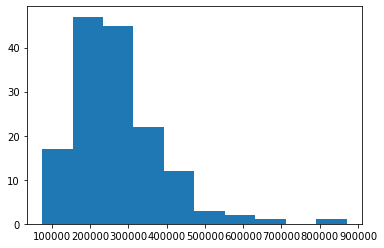

In [18]:
plt.hist(data["Зарплата_средняя"])

по х оси - зарплаты, а по оси у - количество вакансий по зарплатам

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   позиция           150 non-null    object
 1   id_позиций        150 non-null    int64 
 2   зарплата          150 non-null    object
 3   Зарплата_от       150 non-null    int64 
 4   Зарплата_до       150 non-null    int64 
 5   Зарплата_средняя  150 non-null    int64 
 6   Город             150 non-null    object
 7   id_городов        150 non-null    int64 
 8   Организация       150 non-null    object
 9   ставка            150 non-null    int64 
 10  нужный опыт       150 non-null    int64 
 11  айди страницы     150 non-null    int64 
dtypes: int64(8), object(4)
memory usage: 14.2+ KB


# Прогнозирование вакансий по зарплатам с линейной регрессии

In [20]:
import matplotlib.pyplot as plt
from scipy import stats
k = data['Зарплата_средняя']
l = data['id_позиций']
slope, intercept, r, p, std_err = stats.linregress(k, l)
def myfunc(k):
    return slope * k + intercept
mymodel = list(map(myfunc, k))
print("kx + b = "+str(slope)+"*k + "+str(intercept))

kx + b = -7.0141368542614346e-06*k + 26.79110817436713


"kx + b = -7.0141368542614346e-06*k + 26.79110817436713" --- формула линейного регрессии. Intercept – свободный коэффициент; то, чему равна зависимая переменная, если предиктор равен нулю Slope – угол наклона прямой; показывает, насколько изменяется зависимая переменная при изменении предиктора.

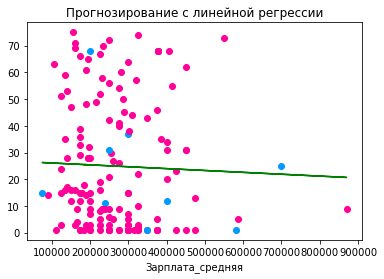

In [21]:
for i in range(len(data)):
    if int(data['ставка'][i])==8:
        plt.scatter(data['Зарплата_средняя'][i], data['id_позиций'][i], c="#FF0099")
    else:
        plt.scatter(data['Зарплата_средняя'][i], data['id_позиций'][i], c="#0099FF")
plt.plot(k, mymodel,c="g")
plt.title('Прогнозирование с линейной регрессии')
plt.xlabel("Зарплата_средняя")
plt.show()

In [22]:
s=''
k=int(input("Введите зарплату: "))
if int(myfunc(k))==1:
    for i in range(len(data)):
        if int(data['id_позиций'][i])==int(myfunc(k)) or int(data['id_позиций'][i])==int(myfunc(k))-1 or int(data['id_позиций'][i])==int(myfunc(k))+1:
            if str(data['позиция'][i]) not in s:
                s+=str(data['позиция'][i])+", "
    print(str(k)+" KZT - прогнозируемая будущая средняя зарплата этих вакансий: "+str(s)[:-2])
else:
    for i in range(len(data)):
        if int(data['id_позиций'][i])==int(myfunc(k)) or int(data['id_позиций'][i])==int(myfunc(k))-1 or int(data['id_позиций'][i])==int(myfunc(k))+1:
            if str(data['позиция'][i]) not in s:
                s+=str(data['позиция'][i])+", "
    print(str(k)+" KZT - прогнозируемая будущая средняя зарплата этих вакансий: "+str(s)[:-2])

Введите зарплату: 250000
250000 KZT - прогнозируемая будущая средняя зарплата этих вакансий: Инженер-проектировщик по электрике, Ведущий инженер по Geomatics, Инженер 1 С ТОИР


# Прогнозирование вакансий по зарплатам с полиномиальной регресcии

In [23]:
import numpy as np
import matplotlib.pyplot as plt
k = data['Зарплата_средняя']
l = data['id_позиций']
mymodel = np.poly1d(np.polyfit(k, l, 3))
myline = np.linspace(75000, 870000, 250000)

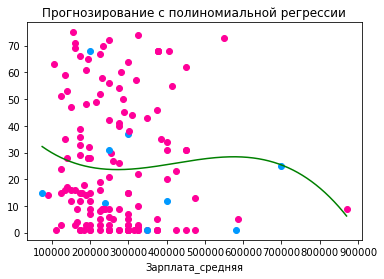

In [24]:
for i in range(len(data)):
    if int(data['ставка'][i])==8:
        plt.scatter(data['Зарплата_средняя'][i], data['id_позиций'][i], c="#FF0099")
    else:
        plt.scatter(data['Зарплата_средняя'][i], data['id_позиций'][i], c="#0099FF")
plt.plot(myline, mymodel(myline), c="g")
plt.title('Прогнозирование с полиномиальной регрессии')
plt.xlabel("Зарплата_средняя")
plt.show()

In [25]:
s=''
k=int(input("Введите зарплату: "))
if int(myfunc(k))==1:
    for i in range(len(data)):
        if int(data['id_позиций'][i])==int(myfunc(k)) or int(data['id_позиций'][i])==int(myfunc(k))-1 or int(data['id_позиций'][i])==int(myfunc(k))+1:
            if str(data['позиция'][i]) not in s:
                s+=str(data['позиция'][i])+", "
    print(str(k)+" KZT - прогнозируемая будущая средняя зарплата этих вакансий: "+str(s)[:-2])
else:
    for i in range(len(data)):
        if int(data['id_позиций'][i])==int(myfunc(k)) or int(data['id_позиций'][i])==int(myfunc(k))-1 or int(data['id_позиций'][i])==int(myfunc(k))+1:
            if str(data['позиция'][i]) not in s:
                s+=str(data['позиция'][i])+", "
    print(str(k)+" KZT - прогнозируемая будущая средняя зарплата этих вакансий: "+str(s)[:-2])

Введите зарплату: 550000
550000 KZT - прогнозируемая будущая средняя зарплата этих вакансий: Инженер-программист, Инженер-строитель(инженер-сметчик/инженер-по сетям), Начальник-Инженер ПТО


# Прогнозирование вакансий по ставкам, зарплатам, опытом работы, id_городов с множественной регрессии

In [29]:
X = data[['ставка', 'Зарплата_от', 'Зарплата_до','нужный опыт', 'id_городов']]
y = data['id_позиций']

In [30]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [31]:
s=''
a=int(input("Введите ставку(полная-8, частичная-7): "))
b=int(input("Введите Зарплата_от: "))
c=int(input('Введите Зарплата_до: '))
d=int(input("Введите рабочий опыт: "))
e1=input("Введите город: ")
for i in range(len(data)):
    if data['Город'][i]==e1:
        e=data['id_городов'][i]
        break
predicted_rbt = regr.predict([[a, b, c, d, e]])
if int(predicted_rbt[0])==1:
    for i in range(len(data)):
        if int(data['id_позиций'][i])==int(predicted_rbt[0]) or int(data['id_позиций'][i])==int(predicted_rbt[0])-1 or int(data['id_позиций'][i])==int(predicted_rbt[0])+1:
            if str(data['позиция'][i]) not in s:
                s+=str(data['позиция'][i])+", "
    print("от "+str(b)+'KZT до '+str(c)+"KZT - прогнозируемая зарплата этих вакансий: "+str(s)[:-2])#+'\nid='+str(int(predicted_rbt[0])-1)+', '+str(int(predicted_rbt[0]))+', '+str(int(predicted_rbt[0])+1))
else:
    for i in range(len(data)):
        if int(data['id_позиций'][i])==int(predicted_rbt[0]) or int(data['id_позиций'][i])==int(predicted_rbt[0])-1 or int(data['id_позиций'][i])==int(predicted_rbt[0])+1:
            if str(data['позиция'][i]) not in s:
                s+=str(data['позиция'][i])+", "
    print("от "+str(b)+' KZT до '+str(c)+" KZT - прогнозируемая зарплата этих вакансий: "+str(s)[:-2])#+'\nid='+str(int(predicted_rbt[0])-1)+', '+str(int(predicted_rbt[0]))+', '+str(int(predicted_rbt[0])+1))

Введите ставку(полная-8, частичная-7): 7
Введите Зарплата_от: 400000
Введите Зарплата_до: 700000
Введите рабочий опыт: 3
Введите город: Нур-Султан
от 400000 KZT до 700000 KZT - прогнозируемая зарплата этих вакансий: Инженер-проектировщик по электрике, Ведущий инженер по Geomatics, Инженер 1 С ТОИР
